In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



C:\Users\abhid\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Titanic Dataset

In [12]:
titanic = pd.read_csv("../../datasets/titanic.csv")

In [13]:
# using subset of features
titanic = titanic[['survived','age','fare']]
titanic.head(3)

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500


In [14]:
# Checking fraction of nulls
titanic.isna().mean()*100

survived     0.000000
age         20.091673
fare         0.076394
dtype: float64

Missing values present in Age and Fare columns

## Train and test sets

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(titanic[['age','fare']],
                                                titanic['survived'],
                                                test_size = 0.33,
                                                random_state = 28)

(X_train.shape,y_train.shape), (X_test.shape,y_test.shape)

(((877, 2), (877,)), ((432, 2), (432,)))

In [16]:
# Checking fraction of nulls in Train set.
# should be similar to overall nulls for representative split
X_train.isna().mean()*100

age     19.95439
fare     0.00000
dtype: float64

### Finding the median age and fare values for imputation

In [18]:
age_median = X_train['age'].median()
fare_median = X_train['fare'].median()
print('Median age: ',age_median)
print('Median fare: ',fare_median)

# imputing the nulls in Train and Test sets
imputation_dict = {'age': age_median,
                  'fare': fare_median}

X_train_imputed = X_train.fillna(imputation_dict)
X_test_imputed = X_test.fillna(imputation_dict)

Median age:  28.0
Median fare:  13.9


In [23]:
pd.concat([X_test,X_test_imputed],axis = 1).sample(20)

,age,fare,age,fare
1030,NaN,8.4583,28.0,8.4583
41,44.0,27.7208,44.0,27.7208
802,NaN,6.9500,28.0,6.9500
1203,40.0,7.8958,40.0,7.8958
458,17.0,10.5000,17.0,10.5000
1214,NaN,8.6625,28.0,8.6625
916,4.0,13.4167,4.0,13.4167
790,39.0,7.2292,39.0,7.2292
277,NaN,146.5208,28.0,146.5208
801,NaN,7.7500,28.0,7.7500


## Effect of imputation on mean and variance

In [27]:
print("Before Imputation: Mean is {} and Var is {}".format(X_train['age'].mean(),X_train['age'].var()))
print("Before Imputation: Mean is {} and Var is {}".format(X_train_imputed['age'].mean(),X_train_imputed['age'].var()))

Before Imputation: Mean is 29.77480997150997 and Var is 207.87249700457946
Before Imputation: Mean is 29.420657468643103 and Var is 166.84916082473012


Since median imputation brings values closer to mean/median , reducing the overall variance

C:\Users\abhid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


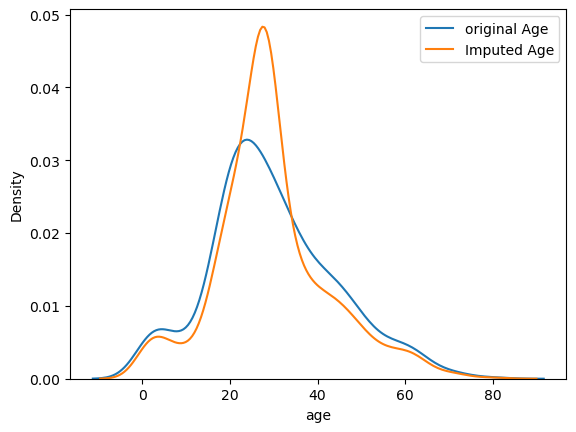

In [30]:
sns.kdeplot(X_train['age'], label = 'original Age')
sns.kdeplot(X_train_imputed['age'], label = 'Imputed Age')
plt.legend()

## Arbitrary value imputation

We'll impute age with arbitrary values significantly different from the rest of the observations.

In [31]:
titanic['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [32]:
X_train['age_99'] = X_train['age'].fillna(99)
X_train['age_minus1'] = X_train['age'].fillna(-1)

In [35]:
X_train['age_median'] = X_train_imputed['age']

In [38]:
X_train.sample(10)

,age,fare,age_99,age_minus1,age_median
1177,NaN,69.5500,99.0,-1.0,28.0
335,51.0,12.5250,51.0,51.0,51.0
1166,NaN,7.2250,99.0,-1.0,28.0
271,24.0,82.2667,24.0,24.0,24.0
349,24.0,13.0000,24.0,24.0,24.0
523,22.0,10.5000,22.0,22.0,22.0
725,22.0,7.7500,22.0,22.0,22.0
112,28.0,263.0000,28.0,28.0,28.0
736,59.0,7.2500,59.0,59.0,59.0
744,19.0,10.1708,19.0,19.0,19.0


### Change in distribution due to imputations

C:\Users\abhid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

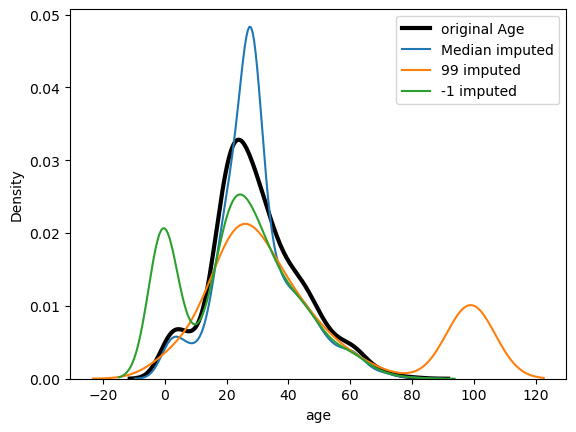

In [43]:
sns.kdeplot(X_train['age'], label = 'original Age',c = 'black',lw = 3)
sns.kdeplot(X_train['age_median'], label = 'Median imputed')
sns.kdeplot(X_train['age_99'], label = '99 imputed')
sns.kdeplot(X_train['age_minus1'], label = '-1 imputed')
plt.legend()

As expected ,  
median imputation make high density towards the mean of the data,  
-1 imputation gives high denity towards -1,  
99 imputation gives high density towrds 99

<Axes: >

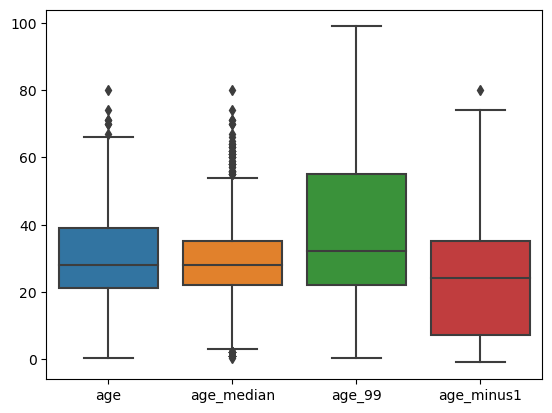

In [44]:
sns.boxplot(X_train[['age','age_median','age_99','age_minus1']])

# Housing prices Dataset

In [59]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

housing = pd.read_csv('../../datasets/housing_prices.csv',usecols=cols_to_use)
print(housing.shape)
housing.head(4)

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000


In [60]:
housing.isna().mean()*100

LotFrontage    17.739726
OverallQual     0.000000
MasVnrArea      0.547945
BsmtUnfSF       0.000000
TotalBsmtSF     0.000000
1stFlrSF        0.000000
GrLivArea       0.000000
GarageYrBlt     5.547945
WoodDeckSF      0.000000
SalePrice       0.000000
dtype: float64

In [61]:
na_cols = [col for col in cols_to_use if housing[col].isna().sum()>0]
print(na_cols)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


### Train and test Datasets of Housing data

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(housing.drop(columns='SalePrice'),
                                                housing['SalePrice'],
                                                test_size = 0.3,
                                                random_state = 28)

(X_train.shape,y_train.shape), (X_test.shape,y_test.shape)

(((1022, 9), (1022,)), ((438, 9), (438,)))

### Median Imputation of na_cols

In [63]:
# creating a dict out of median values of na columns
imputation_dict = housing[na_cols].median().to_dict()
print(imputation_dict)

for col in na_cols:
    X_train[f'{col}_median'] = X_train[col].fillna(imputation_dict[col])
    X_test[f'{col}_median'] = X_test[col].fillna(imputation_dict[col])

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1980.0}


In [65]:
X_train.sample(10)

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
592,60.0,5,0.0,0,816,816,816,1985.0,0,60.0,0.0,1985.0
596,60.0,6,0.0,684,684,684,1368,1930.0,0,60.0,0.0,1930.0
537,NaN,4,0.0,264,864,864,864,1980.0,216,69.0,0.0,1980.0
934,313.0,7,0.0,160,585,2069,2069,1960.0,0,313.0,0.0,1960.0
724,86.0,9,340.0,464,1698,1698,1698,2007.0,327,86.0,340.0,2007.0
521,90.0,6,0.0,467,1244,1244,1244,1957.0,0,90.0,0.0,1957.0
1175,85.0,8,337.0,983,1683,2129,2872,1992.0,0,85.0,337.0,1992.0
286,77.0,6,0.0,312,912,1085,1734,1962.0,0,77.0,0.0,1962.0
881,44.0,7,117.0,254,1156,1187,1717,1990.0,168,44.0,117.0,1990.0
344,36.0,5,0.0,175,536,536,1112,1976.0,182,36.0,0.0,1976.0


### Plotting the effect of imputation on distribution of NA columns

C:\Users\abhid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abhid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

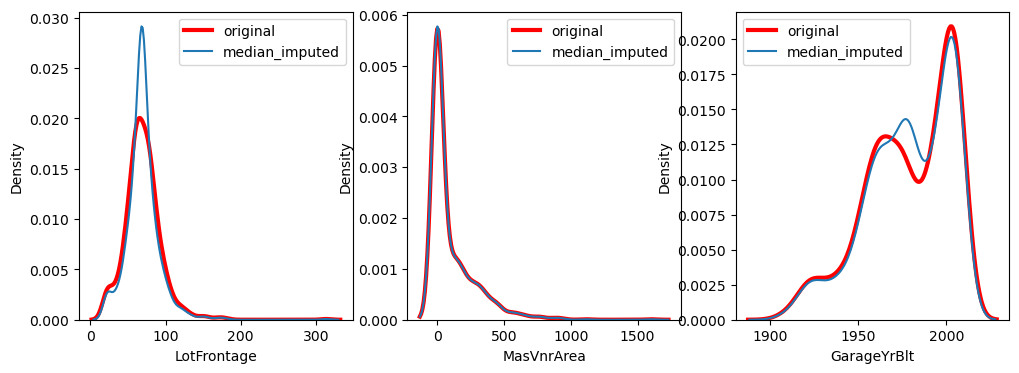

In [81]:
fig,ax = plt.subplots(1,3,figsize = (12,4))

for i in range(3):
    sns.kdeplot(X_train[na_cols[i]],ax = ax[i], c='r', lw=3,label = 'original')
    sns.kdeplot(X_train[f'{na_cols[i]}_median'],ax = ax[i], label = 'median_imputed')
    ax[i].legend()

Observations:  
    1) LotFrontage and GarageYrBlt shows significant distortions due to higher nos of nulls  
    2) MasVnrArea had very small (0.5% only) and shows negligible deviation.

### Effect on Variance

In [84]:
for col in na_cols:
    print(col)
    print()
    print('Original Variance = ',np.round(X_train[col].var()))
    print('Variance after median imputation', np.round(X_train[f'{col}_median'].var()))
    print('--'*30)
    

LotFrontage

Original Variance =  609.0
Variance after median imputation 498.0
------------------------------------------------------------
MasVnrArea

Original Variance =  30524.0
Variance after median imputation 30386.0
------------------------------------------------------------
GarageYrBlt

Original Variance =  605.0
Variance after median imputation 570.0
------------------------------------------------------------


As expected variance reduced due to imputation with central tendency as more values are centred.